In [ ]:
import pandas as pd
import numpy as np
import os


In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## Data
load & merge

In [6]:
dir_path = "TD01_4_Extracting_Features"
HC_file = "HC_features_reading.csv"
PT_file ="PT_features_reading.csv"

In [7]:
# Read the CSV files
hc_path = os.path.join(dir_path, HC_file)
pt_path = os.path.join(dir_path, PT_file)

hc_df = pd.read_csv(hc_path)
pt_df = pd.read_csv(pt_path)

# Add target columns
# hc_df["target"] = 0  # Healthy Control
# pt_df["target"] = 1  # Patient

# Merge and shuffle
merged_df = pd.concat([hc_df, pt_df], ignore_index=True)
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the merged file
output_path = os.path.join(dir_path, "features_egemaps_reading.csv")
merged_df.to_csv(output_path, index=False)

print(f"Merged and shuffled dataset saved to: {output_path}")
print(merged_df.head())


Merged and shuffled dataset saved to: TD01_4_Extracting_Features/features_egemaps_reading.csv
   F0semitoneFrom27.5Hz_sma3nz_amean  F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                          30.550520                                0.131445   
1                          34.733790                                0.092321   
2                          28.805117                                0.135681   
3                          22.344229                                0.122594   
4                          35.262900                                0.117946   

   F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                   27.363289   
1                                   32.539100   
2                                   27.308159   
3                                   20.597366   
4                                   32.831944   

   F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                   30.496315   
1                               

In [ ]:
merged_df_4 = pd.concat([hc_df, pt_df], ignore_index=True)
merged_df_4['file'] = merged_df_4['file'].str.replace('.wav', '')

In [ ]:
merged_df.shape

(112, 90)

In [9]:
merged_df.columns

Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_

## 1 SVM

### read speech

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/home/tacit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
## if file is available
# dir_path = "TD01_4_Extracting_Features"
# merged_file = os.path.join(dir_path, "features_egemaps_reading.csv")

# merged_df = pd.read_csv(merged_file)

In [11]:
# Drop non-feature columns
if "file" in merged_df.columns:
    merged_df = merged_df.drop(columns=["file"])

# Split features and labels
X = merged_df.drop(columns=["target"])
y = merged_df["target"]


In [ ]:

# Task 1: Implement & evaluate Linear SVM

svm = make_pipeline(StandardScaler(), SVC(kernel="linear"))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
coefs = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Extract coefficients (from the SVC inside the pipeline)
    coefs.append(svm.named_steps['svc'].coef_[0])

print(f"Cross-validation accuracy (mean +- std): {np.mean(accuracies):.3f} +- {np.std(accuracies):.3f}")



Cross-validation accuracy (mean +- std): 0.759 +- 0.061


In [38]:

# Task 2: Extract coefficients per fold
coefs = np.array(coefs)  # shape (n_folds, n_features)



In [39]:
# Task 3: Plot average relative contribution (%)
# Compute absolute weights -> relative contribution per fold
abs_coefs = np.abs(coefs)
rel_contrib = abs_coefs / abs_coefs.sum(axis=1, keepdims=True) * 100  # percentage


In [17]:
rel_contrib.shape

(5, 88)

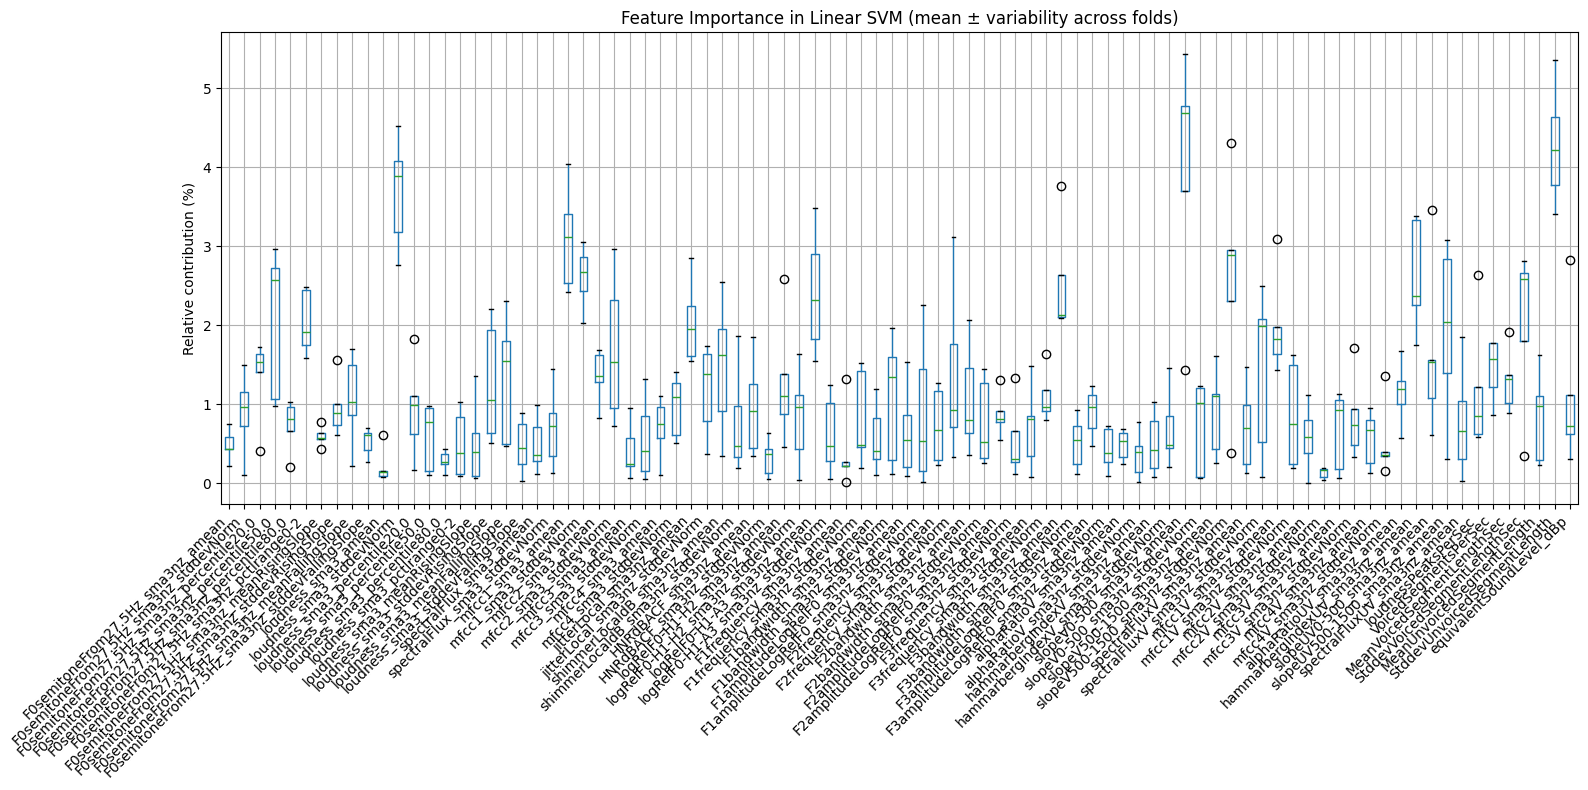

In [40]:
# Create DataFrame for visualization
rel_df = pd.DataFrame(rel_contrib, columns=X.columns)

# Boxplot
plt.figure(figsize=(16, 8))
rel_df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.ylabel("Relative contribution (%)")
plt.title("Feature Importance in Linear SVM (mean ± variability across folds)")
plt.tight_layout()
plt.show()

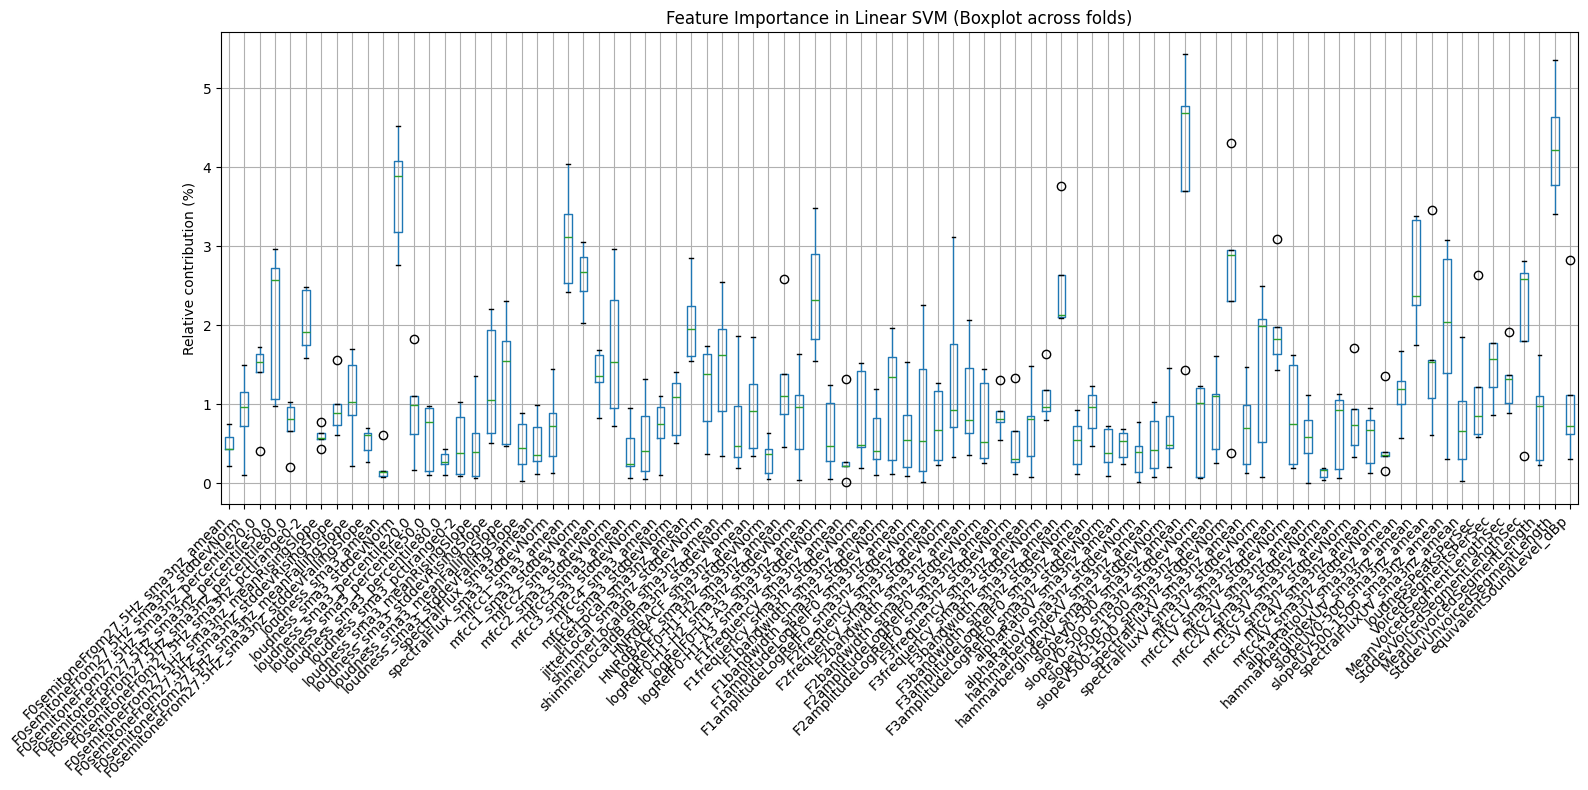

In [24]:
# --- Boxplot (variability across folds) ---
plt.figure(figsize=(16, 8))
rel_df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.ylabel("Relative contribution (%)")
plt.title("Feature Importance in Linear SVM (Boxplot across folds)")
plt.tight_layout()
plt.show()

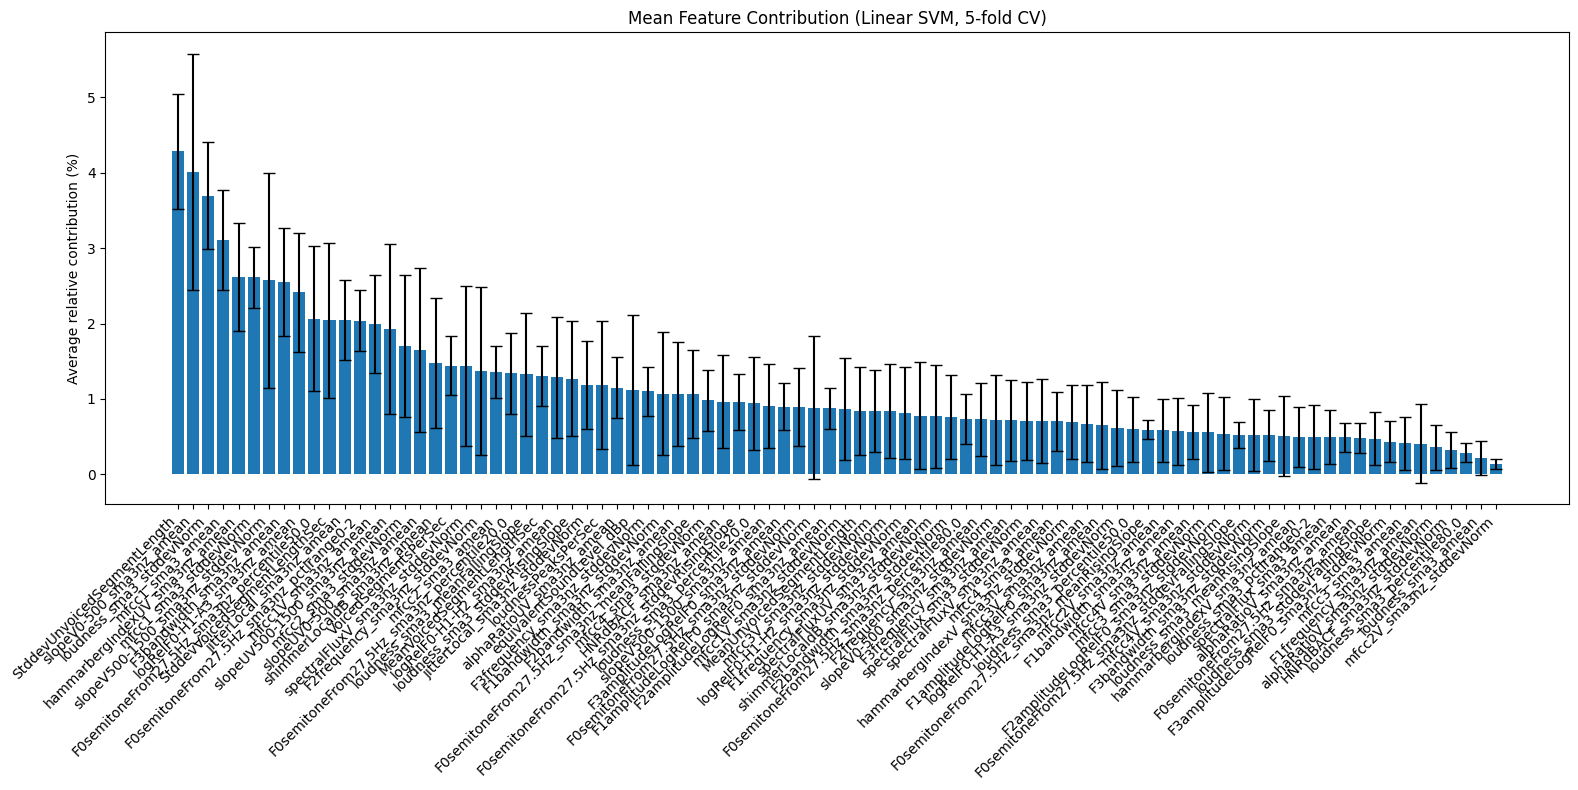

In [22]:
# --- Sorted bar plot of mean ± std ---
mean_contrib = rel_df.mean().sort_values(ascending=False)
std_contrib = rel_df.std()[mean_contrib.index]

plt.figure(figsize=(16, 8))
plt.bar(mean_contrib.index, mean_contrib.values, yerr=std_contrib.values, capsize=4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average relative contribution (%)")
plt.title("Mean Feature Contribution (Linear SVM, 5-fold CV)")
plt.tight_layout()
plt.show()

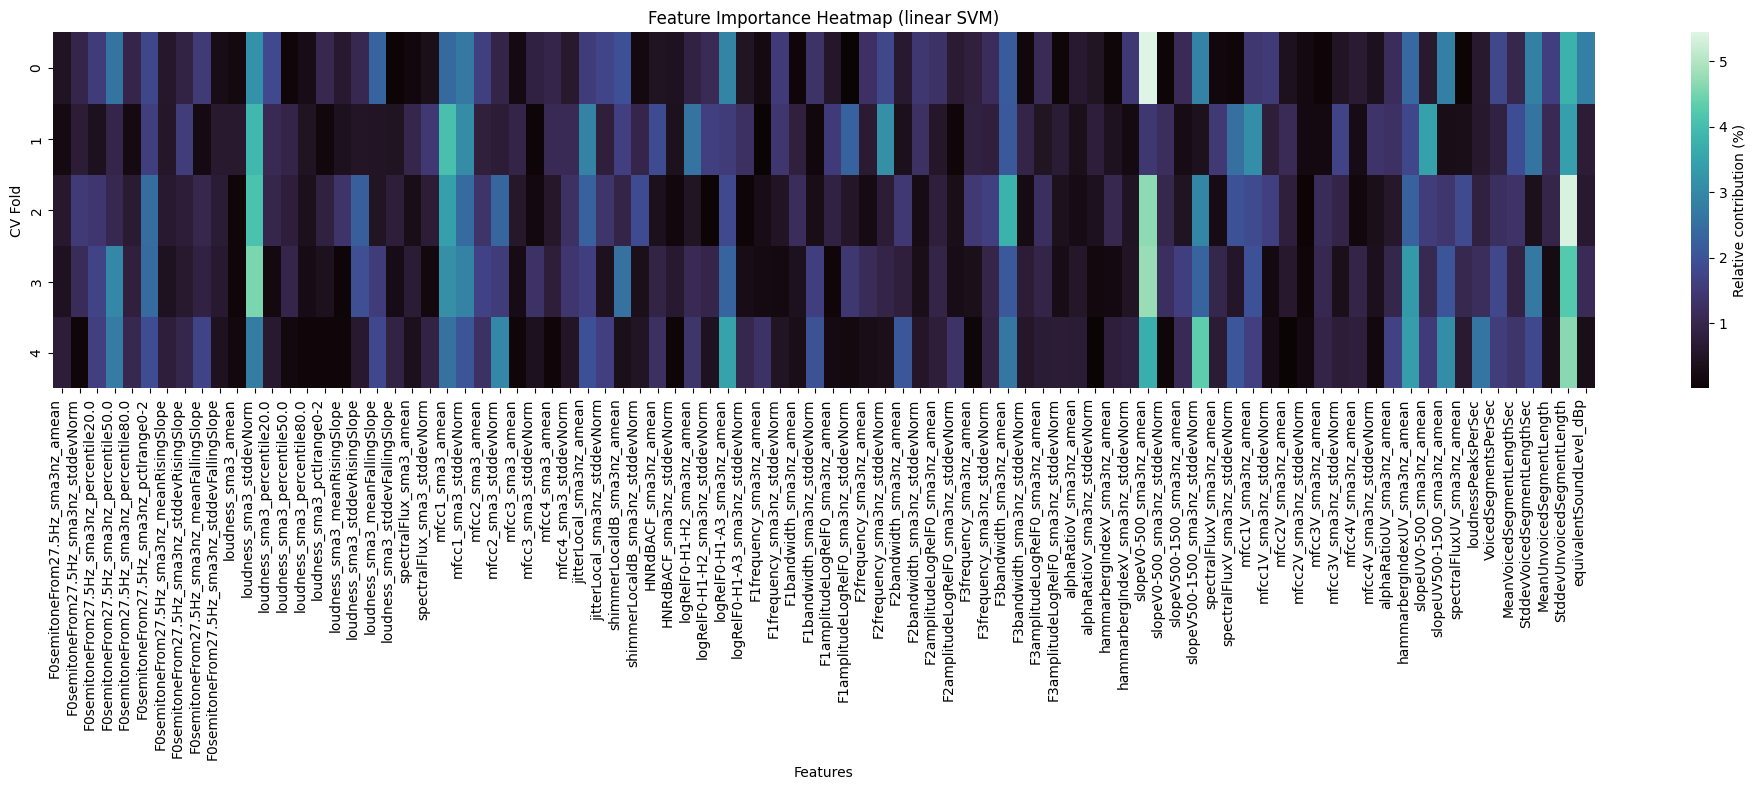

In [44]:
plt.figure(figsize=(20, 8))
sns.heatmap(rel_df, cmap="mako", annot=False, cbar_kws={'label': 'Relative contribution (%)'})
plt.xlabel("Features")
plt.ylabel("CV Fold")
plt.title("Feature Importance Heatmap (linear SVM)")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [34]:
mean_contrib[:10]

StddevUnvoicedSegmentLength                   4.282278
slopeV0-500_sma3nz_amean                      4.009658
loudness_sma3_stddevNorm                      3.693067
mfcc1_sma3_amean                              3.106186
hammarbergIndexUV_sma3nz_amean                2.621033
mfcc1_sma3_stddevNorm                         2.612366
slopeV500-1500_sma3nz_stddevNorm              2.572361
F3bandwidth_sma3nz_amean                      2.549120
logRelF0-H1-A3_sma3nz_amean                   2.415666
F0semitoneFrom27.5Hz_sma3nz_percentile50.0    2.062963
dtype: float64

### spontaneous

In [ ]:
i_path = "features_egemaps_spont.csv"
df_i = pd.read_csv(i_path)

In [ ]:
X_i = df_i.drop(columns=["target"])
y_i = df_i["target"]

In [ ]:
merged_df_4 = pd.concat([hc_df, pt_df], ignore_index=True)
merged_df_4['file'] = merged_df_4['file'].str.replace('.wav', '')

## 2 SVM RBF

### read speech

In [27]:
from sklearn.inspection import permutation_importance

In [29]:
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1, gamma='scale', random_state=42))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
perm_importances = []
accuracies = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    r = permutation_importance(
        svm_rbf, X_test, y_test,
        n_repeats=30, random_state=42, n_jobs=-1
    )
    perm_importances.append(r.importances_mean)
    print(f"Fold {fold} accuracy: {acc:.3f}")

print(f"\nMean cross-validation accuracy: {np.mean(accuracies):.3f} +- {np.std(accuracies):.3f}")


Fold 1 accuracy: 0.739
Fold 2 accuracy: 0.696
Fold 3 accuracy: 0.818
Fold 4 accuracy: 0.727
Fold 5 accuracy: 0.818

Mean cross-validation accuracy: 0.760 +- 0.050


In [30]:
# Relative contribution (%)
perm_importances = np.array(perm_importances)
abs_perm = np.abs(perm_importances)
rel_perm = abs_perm / abs_perm.sum(axis=1, keepdims=True) * 100
rel_df = pd.DataFrame(rel_perm, columns=X.columns)

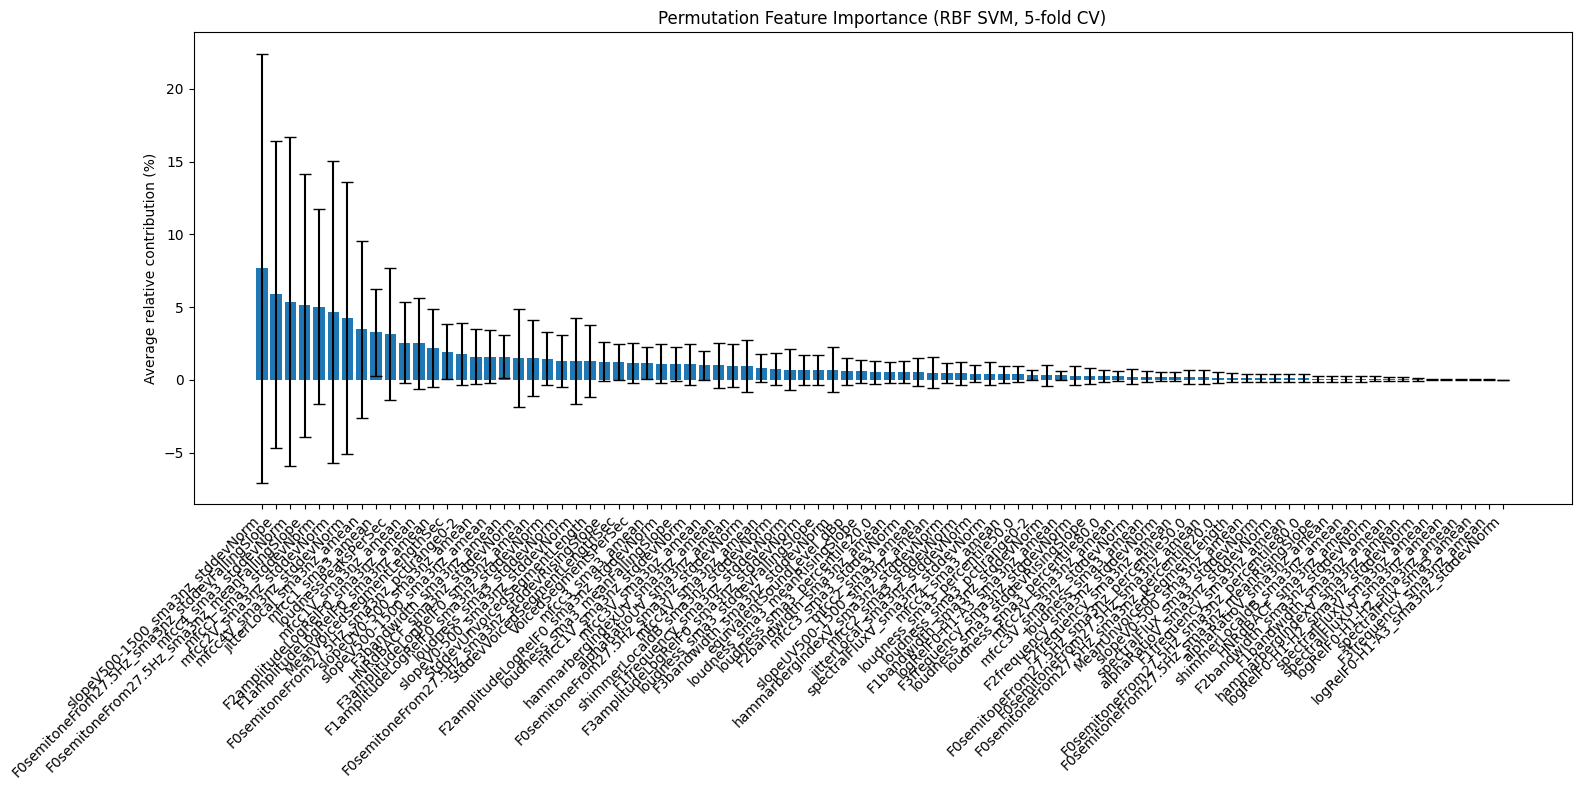

In [ ]:
mean_perm = rel_df.mean().sort_values(ascending=False)
std_perm = rel_df.std()[mean_perm.index]

plt.figure(figsize=(16, 8))
plt.bar(mean_perm.index, mean_perm.values, yerr=std_perm.values, capsize=4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average relative contribution (%)")
plt.title("Permutation Feature Importance (RBF SVM, 5-fold CV)")
plt.tight_layout()
plt.show()

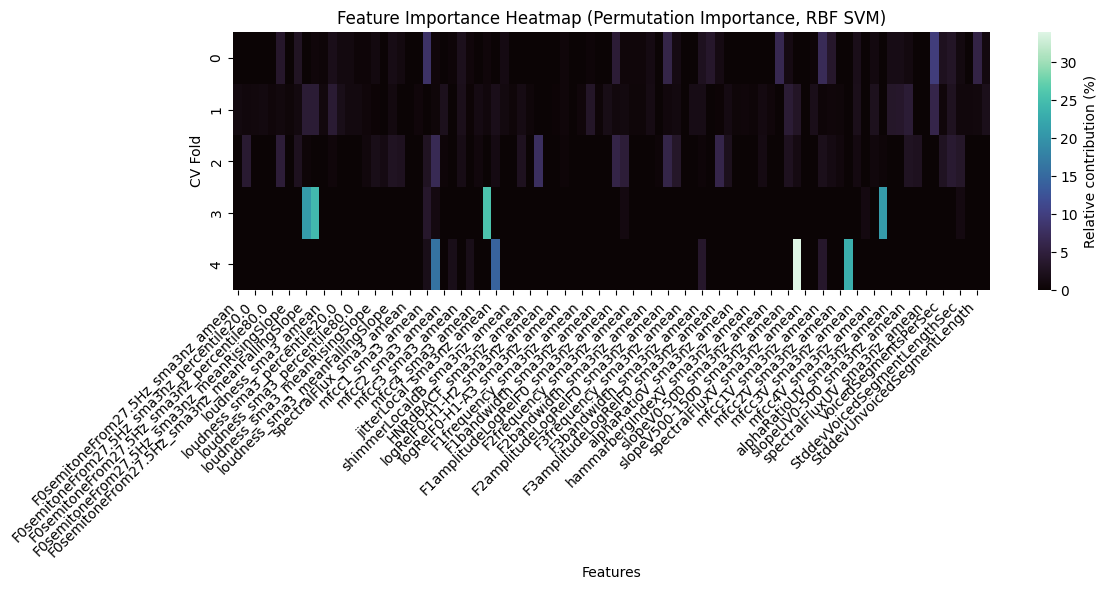

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(rel_df, cmap="mako", annot=False, cbar_kws={'label': 'Relative contribution (%)'})
plt.xlabel("Features")
plt.ylabel("CV Fold")
plt.title("Feature Importance Heatmap (Permutation Importance, RBF SVM)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
mean_perm[:10]

slopeV500-1500_sma3nz_stddevNorm                  7.674858
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope    5.873599
mfcc4_sma3_stddevNorm                             5.381858
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope      5.124333
mfcc1_sma3_stddevNorm                             5.031007
mfcc2V_sma3nz_stddevNorm                          4.642857
mfcc4V_sma3nz_stddevNorm                          4.259847
jitterLocal_sma3nz_amean                          3.489277
mfcc1_sma3_amean                                  3.261781
loudnessPeaksPerSec                               3.158527
dtype: float64

### spontaneous

## 3

In [48]:
n_splits = 5
random_state = 42
n_repeats_perm = 30   # repeats for permutation importance
top_k = 15


print("Computing permutation importances for RBF SVM across folds...")
svm_rbf_pipe = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", random_state=random_state))
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

perm_importances_folds = []
accs_rbf = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    svm_rbf_pipe.fit(X_train, y_train)
    y_pred = svm_rbf_pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs_rbf.append(acc)
    print(f" Fold {fold} accuracy: {acc:.3f}")
    
    r = permutation_importance(
        svm_rbf_pipe, X_test, y_test,
        n_repeats=n_repeats_perm, random_state=random_state, n_jobs=-1
    )
    # r.importances_mean is length n_features
    perm_importances_folds.append(r.importances_mean)


Computing permutation importances for RBF SVM across folds...
 Fold 1 accuracy: 0.739
 Fold 2 accuracy: 0.696
 Fold 3 accuracy: 0.818
 Fold 4 accuracy: 0.727
 Fold 5 accuracy: 0.818


In [49]:
print("\nEvaluating pipeline with PCA (90% variance retained)...")
# We'll perform CV manually to be able to inspect fitted PCA for each fold
accs_pca = []
n_components_list = []
pca_components_per_fold = []  # will store fitted PCA objects to inspect loadings later

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=0.90, svd_solver='full', random_state=random_state)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    n_components_list.append(pca.n_components_)
    pca_components_per_fold.append(pca)  # save for loadings
    
    # Train SVM on PCA space
    svc_on_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_state)
    svc_on_pca.fit(X_train_pca, y_train)
    y_pred = svc_on_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accs_pca.append(acc)
    print(f" Fold {fold} (PCA comps={pca.n_components_}) accuracy: {acc:.3f}")

print(f"Mean CV accuracy with PCA (keep 90% var): {np.mean(accs_pca):.3f} ± {np.std(accs_pca):.3f}")
print("PCA components per fold:", n_components_list)


Evaluating pipeline with PCA (90% variance retained)...
 Fold 1 (PCA comps=20) accuracy: 0.739
 Fold 2 (PCA comps=19) accuracy: 0.652
 Fold 3 (PCA comps=19) accuracy: 0.818
 Fold 4 (PCA comps=19) accuracy: 0.773
 Fold 5 (PCA comps=19) accuracy: 0.818
Mean CV accuracy with PCA (keep 90% var): 0.760 ± 0.062
PCA components per fold: [20, 19, 19, 19, 19]


In [50]:
print("\nComputing permutation importance on PCA components across folds...")
pca_perm_folds = []  # shape (n_folds, n_pca_components_of_that_fold) -> will store as ragged list first
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit scaler + PCA on train
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=0.90, svd_solver='full', random_state=random_state)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    n_pca = X_train_pca.shape[1]
    
    # Train SVC on PCA features
    svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=random_state)
    svc.fit(X_train_pca, y_train)
    
    # We will perform permutation importance **on PCA components** (i.e., permute columns of X_test_pca)
    # sklearn's permutation_importance can be applied directly to svc with the PCA-transformed arrays.
    r = permutation_importance(
        svc, X_test_pca, y_test,
        n_repeats=n_repeats_perm, random_state=random_state, n_jobs=-1
    )
    # r.importances_mean length = n_pca
    pca_perm_folds.append(r.importances_mean)

# Now convert to array: but components count may differ across folds.
# To make them comparable, we'll keep the minimum n_components across folds or pad with zeros.
n_pca_per_fold = [len(a) for a in pca_perm_folds]
min_n_pca = min(n_pca_per_fold)
max_n_pca = max(n_pca_per_fold)
print("PCA components across folds (counts):", n_pca_per_fold)
print("Using min_n_pca =", min_n_pca, "for aligned comparison (components 0..min_n_pca-1).")

# Trim each fold's importances to the first min_n_pca components
pca_perm_trimmed = np.array([arr[:min_n_pca] for arr in pca_perm_folds])  # shape (n_folds, min_n_pca)

# Convert to relative contribution per fold (%)
abs_pca_perm = np.abs(pca_perm_trimmed)
rel_pca_perm = abs_pca_perm / abs_pca_perm.sum(axis=1, keepdims=True) * 100
rel_pca_df = pd.DataFrame(rel_pca_perm, columns=[f"PC{idx+1}" for idx in range(min_n_pca)])


Computing permutation importance on PCA components across folds...
PCA components across folds (counts): [20, 19, 19, 19, 19]
Using min_n_pca = 19 for aligned comparison (components 0..min_n_pca-1).


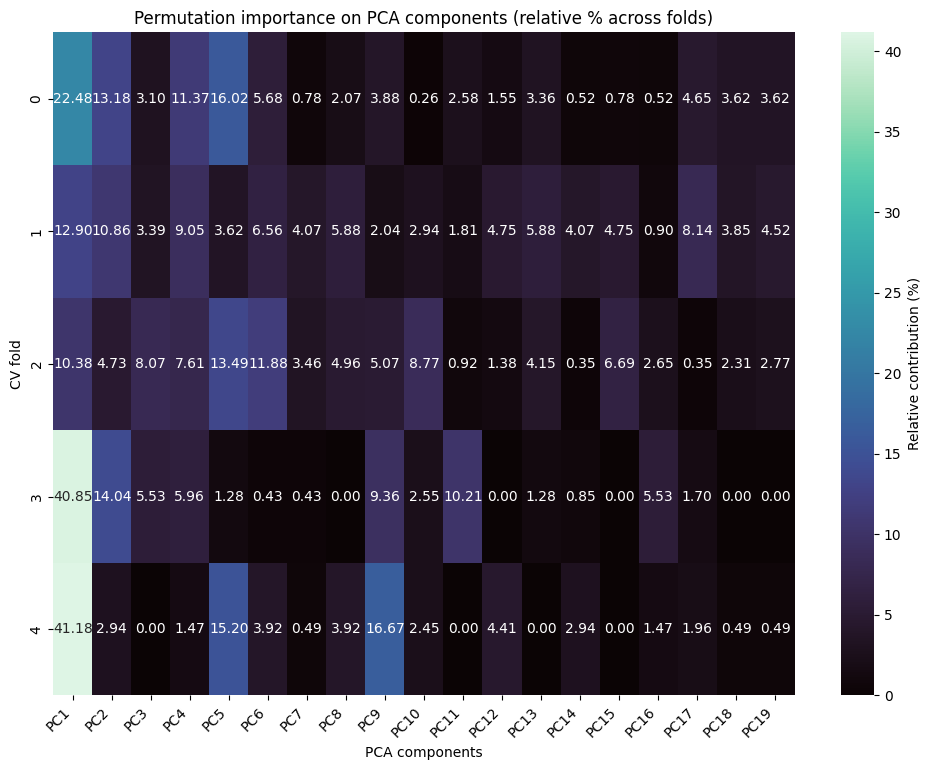

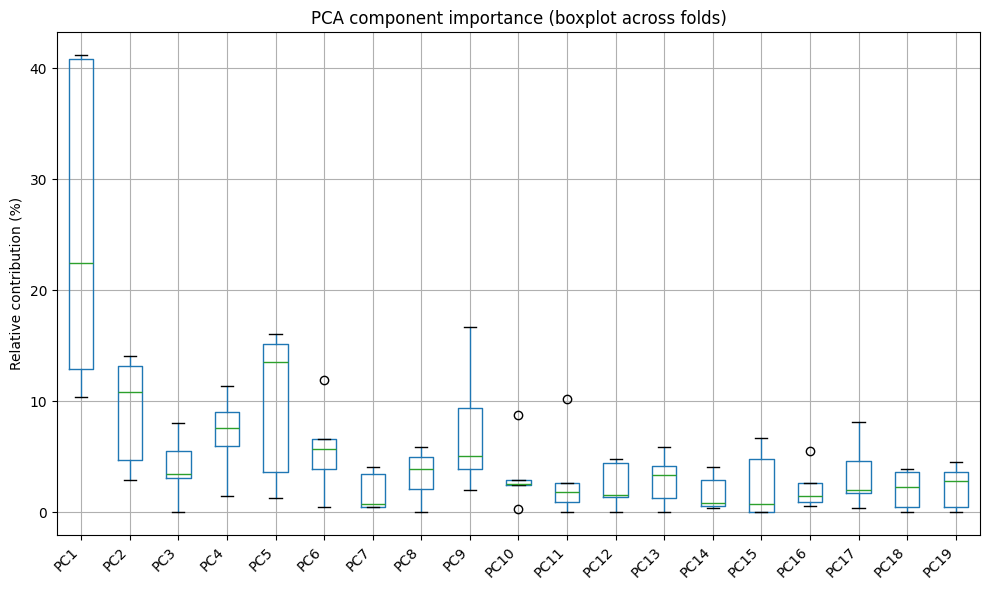

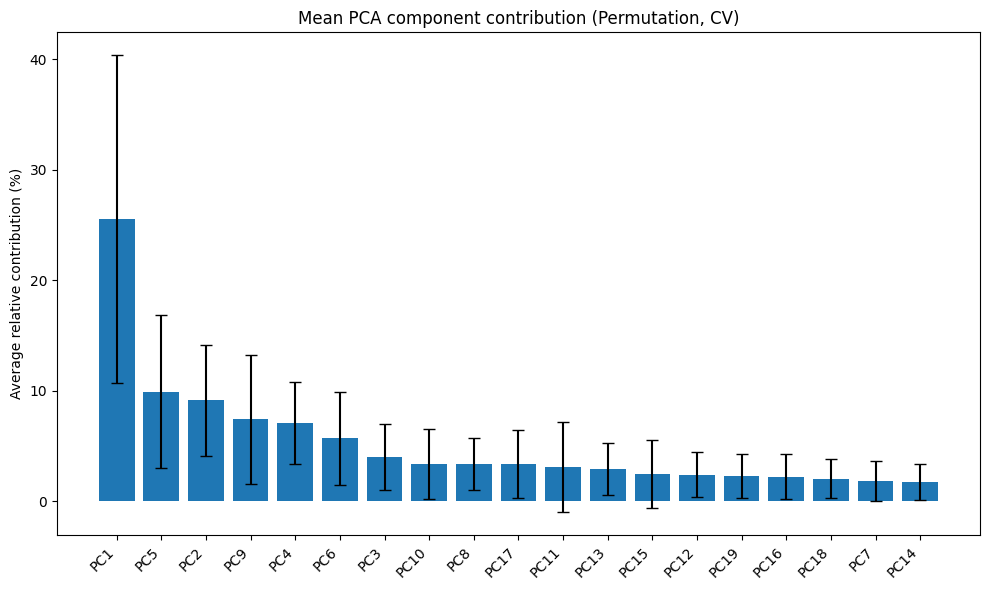

In [51]:
# Heatmap: folds x PC
plt.figure(figsize=(10, 4 + 0.2*min_n_pca))
sns.heatmap(rel_pca_df, annot=True, fmt=".2f", cmap="mako", cbar_kws={'label': 'Relative contribution (%)'})
plt.xlabel("PCA components")
plt.ylabel("CV fold")
plt.title("Permutation importance on PCA components (relative % across folds)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(dir_path, "pca_perm_importance_heatmap.png"), dpi=200)
plt.close()

# Boxplot across folds for each PC
plt.figure(figsize=(10, 6))
rel_pca_df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.ylabel("Relative contribution (%)")
plt.title("PCA component importance (boxplot across folds)")
plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(dir_path, "pca_perm_importance_boxplot.png"), dpi=200)
plt.close()

# Mean ± std bar plot
mean_pca = rel_pca_df.mean().sort_values(ascending=False)
std_pca = rel_pca_df.std()[mean_pca.index]

plt.figure(figsize=(10, 6))
plt.bar(mean_pca.index, mean_pca.values, yerr=std_pca.values, capsize=4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average relative contribution (%)")
plt.title("Mean PCA component contribution (Permutation, CV)")
plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(dir_path, "pca_perm_importance_bar.png"), dpi=200)
plt.close()



In [53]:
# ----------------------------
# 6) Inspect PCA loadings for interpreting important components
#    We'll find, for each of the top PCA components (by mean importance), the original features
#    with the largest absolute loadings.
# ----------------------------
# We'll use the PCA fitted on the full dataset to produce a consistent loading matrix to interpret components.
print("\nFitting a final PCA on the full dataset (retain 90% variance) to inspect global loadings...")
scaler_full = StandardScaler().fit(X)
feature_names = list(X.columns)
X_scaled_full = scaler_full.transform(X)
pca_full = PCA(n_components=0.90, svd_solver='full', random_state=random_state)
X_full_pca = pca_full.fit_transform(X_scaled_full)
n_pca_full = pca_full.n_components_
print("PCA fitted on full data has n_components =", n_pca_full)

# Get loadings (components_ shape: n_components x n_original_features)
loadings = pca_full.components_  # each row: component; columns correspond to original features in order feature_names

# Map top PCA components (we'll align to first min_n_pca components used earlier)
# Use mean_pca to determine order (but if mean_pca index is e.g. PC3 that's first we consider).
ordered_pca_names = list(mean_pca.index)  # names like "PC1", "PC2", ...
# Convert name "PCk" -> index (k-1)
ordered_indices = [int(name.replace("PC", "")) - 1 for name in ordered_pca_names]

# But the final PCA may have different n_components; ensure indices within range
ordered_indices = [i for i in ordered_indices if i < n_pca_full]
# Limit to min_n_pca as earlier
ordered_indices = ordered_indices[:min_n_pca]

# For each selected PCA index, find top contributing original features
top_features_by_pc = {}
n_top_per_pc = 6
for pc_idx in ordered_indices:
    pc_loadings = loadings[pc_idx]  # length n_original_features
    abs_load = np.abs(pc_loadings)
    top_idx = np.argsort(abs_load)[-n_top_per_pc:][::-1]  # top indices descending
    top_feature_names = [feature_names[i] for i in top_idx]
    top_load_values = pc_loadings[top_idx]
    top_features_by_pc[f"PC{pc_idx+1}"] = list(zip(top_feature_names, np.round(top_load_values, 4)))

print("\nTop contributing original features per selected PCA component:")
for pc, items in top_features_by_pc.items():
    print(f" {pc}:")
    for fname, val in items:
        print(f"   {fname}: {val}")


Fitting a final PCA on the full dataset (retain 90% variance) to inspect global loadings...
PCA fitted on full data has n_components = 20

Top contributing original features per selected PCA component:
 PC1:
   logRelF0-H1-A3_sma3nz_stddevNorm: 0.1914
   VoicedSegmentsPerSec: 0.184
   F1amplitudeLogRelF0_sma3nz_amean: -0.1815
   F2amplitudeLogRelF0_sma3nz_amean: -0.1728
   F1amplitudeLogRelF0_sma3nz_stddevNorm: 0.1723
   MeanVoicedSegmentLengthSec: -0.1721
 PC5:
   mfcc1V_sma3nz_amean: -0.2421
   F1frequency_sma3nz_amean: -0.2349
   F2frequency_sma3nz_amean: -0.2035
   logRelF0-H1-H2_sma3nz_amean: -0.2023
   loudnessPeaksPerSec: 0.2004
   shimmerLocaldB_sma3nz_stddevNorm: -0.1947
 PC2:
   F0semitoneFrom27.5Hz_sma3nz_amean: -0.2192
   F0semitoneFrom27.5Hz_sma3nz_percentile80.0: -0.2137
   F0semitoneFrom27.5Hz_sma3nz_percentile20.0: -0.2127
   F0semitoneFrom27.5Hz_sma3nz_percentile50.0: -0.2112
   mfcc4_sma3_amean: 0.2082
   mfcc4V_sma3nz_amean: 0.206
 PC9:
   MeanUnvoicedSegmentLength: